In [ ]:
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt

nt, ny, nx = 360, 30, 30
X, Y = np.meshgrid(np.linspace(0, 1, nx), np.linspace(0, 1, ny), indexing="xy")
directional_bias = (X + Y)

time = np.arange(nt)
# Two peaks and two bottoms in one period
temporal_wind = 10 * (np.sin(2 * np.pi * time / nt)**2) + 3

# Wind direction (fixed): theta = 45 deg = pi/4
theta_wind = np.pi / 4
ux, uy = np.cos(theta_wind), np.sin(theta_wind)

u10 = np.zeros((nt, ny, nx))
v10 = np.zeros((nt, ny, nx))

for n in range(nt):
    base = temporal_wind[n] + 0.5 * (directional_bias - 0.5)
    noise = scipy.ndimage.gaussian_filter(np.random.randn(ny, nx), sigma=2)
    magnitude = base + 0.5 * noise  # for spatial variation
    u10[n] = magnitude * ux
    v10[n] = magnitude * uy

with open("/home/yothunder/fort/wvmod/input/u10.txt", "w") as f:
    for n in range(nt):
        for j in range(ny):
            for i in range(nx):
                f.write(f"{u10[n,j,i]:.4f}\n")

with open("/home/yothunder/fort/wvmod/input/v10.txt", "w") as f:
    for n in range(nt):
        for j in range(ny):
            for i in range(nx):
                f.write(f"{v10[n,j,i]:.4f}\n")


<xarray.Dataset> Size: 10MB
Dimensions:  (time: 360, y: 30, x: 30)
Coordinates:
  * time     (time) int64 3kB 0 1 2 3 4 5 6 7 ... 353 354 355 356 357 358 359
  * y        (y) int64 240B 0 1 2 3 4 5 6 7 8 9 ... 21 22 23 24 25 26 27 28 29
  * x        (x) int64 240B 0 1 2 3 4 5 6 7 8 9 ... 21 22 23 24 25 26 27 28 29
Data variables:
    u10      (time, y, x) float64 3MB 2.037 2.047 2.062 ... 2.627 2.645 2.656
    v10      (time, y, x) float64 3MB 2.037 2.047 2.062 ... 2.627 2.645 2.656
    spd      (time, y, x) float64 3MB 2.881 2.894 2.916 ... 3.715 3.741 3.757
    theta    (time, y, x) float64 3MB 0.7854 0.7854 0.7854 ... 0.7854 0.7854

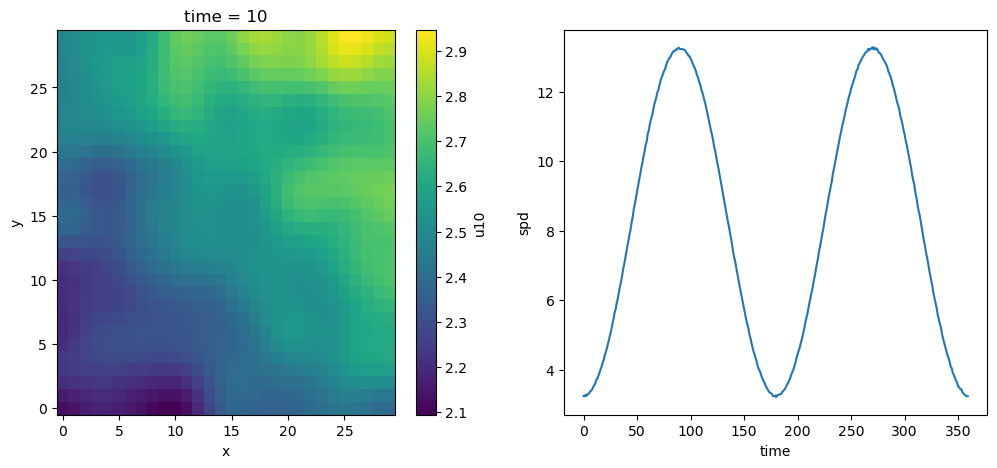

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Define your grid shape
nt, ny, nx = 360, 30, 30

# Load flattened wind data
u_data = np.loadtxt("/home/yothunder/fort/wvmod/input/u10.txt")
v_data = np.loadtxt("/home/yothunder/fort/wvmod/input/v10.txt")

# Reshape to (time, y, x)
u10 = u_data.reshape((nt, ny, nx))
v10 = v_data.reshape((nt, ny, nx))

# Create coordinates
time = np.arange(nt)
x = np.arange(nx)
y = np.arange(ny)

# Create xarray Dataset
ds = xr.Dataset(
    {
        "u10": (("time", "y", "x"), u10),
        "v10": (("time", "y", "x"), v10),
        "spd": (("time", "y", "x"), np.sqrt(u10**2 + v10**2)),
        "theta": (("time", "y", "x"), np.arctan2(v10, u10)),  # radians
    },
    coords={"time": time, "y": y, "x": x}
)
display(ds)

import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))
ds.u10.isel(time=10).plot(cmap='viridis', ax=ax[0])
ds.mean(dim=['x', 'y']).spd.plot(ax=ax[1])
